## Forcasting Stock Performance in Our Alternative Renewable Energy Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 10 Year's Worth of Alternative RE companies Stock Price Data via Alpaca API Call

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['BAM', 'ETN', 'GE', 'NEE', 'NRG', 'OC', 'ORA']

# Get 10 year's worth of historical price data 
ALTERNATIVE_RE = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
ALTERNATIVE_RE.head()

BAM                                  ETN          \
                            open   high    low  close   volume   open    high   
time                                                                            
2019-08-09 00:00:00-04:00  50.27  51.03  50.12  50.88  1654827  79.30  79.710   
2019-08-12 00:00:00-04:00  50.79  51.16  50.49  50.53  1286362  78.55  78.840   
2019-08-13 00:00:00-04:00  50.38  51.14  50.23  51.04  1755703  78.02  80.370   
2019-08-14 00:00:00-04:00  50.43  50.67  49.72  49.75  1954272  77.60  77.944   
2019-08-15 00:00:00-04:00  49.90  50.29  49.70  50.05  1380392  75.28  76.070   

                                                  ...     OC                \
                             low  close   volume  ...   open   high    low   
time                                              ...                        
2019-08-09 00:00:00-04:00  78.26  79.05  2041996  ...  55.07  55.34  53.93   
2019-08-12 00:00:00-04:00  77.77  78.00  1606963  ...  53.76  53.90  53.11   
2019-08-13 00:00:00-04:00  77.62  79.42  1907991  ...  53.43  55.55  53.43   
2019-08-14 00:00:00-04:00  74.95  75.17  4641749  ...  53.73  53.80  52.99   
2019-08-15 00:00:00-04:00  74.86  75.89  2230151  ...  53.90  54.45  53.45   

                                            ORA                                 
                           close  volume   open     high    low  close  volume  
time                                                                            
2019-08-09 00:00:00-04:00  54.09  886463  68.25  71.6500  68.25  71.23  231516  
2019-08-12 00:00:00-04:00  53.50  427794  70.94  71.1800  70.15  70.81  102425  
2019-08-13 00:00:00-04:00  54.38  505103  70.81  72.5800  70.81  72.21  192443  
2019-08-14 00:00:00-04:00  53.59  653853  71.69  72.3899  71.00  71.61  147757  
2019-08-15 00:00:00-04:00  53.73  834090  71.39  72.4900  71.39  72.33  114826  

[5 rows x 35 columns]

In [5]:
ALTERNATIVE_RE.isnull().sum()

BAM  open      0
     high      0
     low       0
     close     0
     volume    0
ETN  open      0
     high      0
     low       0
     close     0
     volume    0
GE   open      0
     high      0
     low       0
     close     0
     volume    0
NEE  open      0
     high      0
     low       0
     close     0
     volume    0
NRG  open      0
     high      0
     low       0
     close     0
     volume    0
OC   open      0
     high      0
     low       0
     close     0
     volume    0
ORA  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [6]:
ALTERNATIVE_RE.dropna()

BAM                                    ETN  \
                            open    high     low  close   volume   open   
time                                                                      
2019-08-09 00:00:00-04:00  50.27  51.030  50.120  50.88  1654827  79.30   
2019-08-12 00:00:00-04:00  50.79  51.160  50.490  50.53  1286362  78.55   
2019-08-13 00:00:00-04:00  50.38  51.140  50.230  51.04  1755703  78.02   
2019-08-14 00:00:00-04:00  50.43  50.670  49.720  49.75  1954272  77.60   
2019-08-15 00:00:00-04:00  49.90  50.290  49.700  50.05  1380392  75.28   
...                          ...     ...     ...    ...      ...    ...   
2019-12-24 00:00:00-05:00  57.57  57.670  57.120  57.63   529054  95.36   
2019-12-26 00:00:00-05:00  57.77  58.000  57.550  57.92   451673  94.66   
2019-12-27 00:00:00-05:00  58.20  58.230  57.740  58.08   695811  95.34   
2019-12-30 00:00:00-05:00  58.08  58.130  57.610  57.82   853124  94.95   
2019-12-31 00:00:00-05:00  57.82  57.935  57.525  57.81  1000189  94.78   

                                                           ...     OC          \
                             high     low  close   volume  ...   open    high   
time                                                       ...                  
2019-08-09 00:00:00-04:00  79.710  78.260  79.05  2041996  ...  55.07  55.340   
2019-08-12 00:00:00-04:00  78.840  77.770  78.00  1606963  ...  53.76  53.900   
2019-08-13 00:00:00-04:00  80.370  77.620  79.42  1907991  ...  53.43  55.550   
2019-08-14 00:00:00-04:00  77.944  74.950  75.17  4641749  ...  53.73  53.800   
2019-08-15 00:00:00-04:00  76.070  74.860  75.89  2230151  ...  53.90  54.450   
...                           ...     ...    ...      ...  ...    ...     ...   
2019-12-24 00:00:00-05:00  95.360  94.300  94.50   576817  ...  65.08  65.520   
2019-12-26 00:00:00-05:00  95.050  94.260  95.05   781351  ...  65.24  65.325   
2019-12-27 00:00:00-05:00  95.390  94.830  95.00   725342  ...  65.47  65.505   
2019-12-30 00:00:00-05:00  95.480  94.555  94.96   808429  ...  65.24  65.260   
2019-12-31 00:00:00-05:00  95.290  94.410  94.70   942473  ...  64.64  65.310   

                                                    ORA                    \
                              low  close  volume   open     high      low   
time                                                                        
2019-08-09 00:00:00-04:00  53.930  54.09  886463  68.25  71.6500  68.2500   
2019-08-12 00:00:00-04:00  53.110  53.50  427794  70.94  71.1800  70.1500   
2019-08-13 00:00:00-04:00  53.430  54.38  505103  70.81  72.5800  70.8100   
2019-08-14 00:00:00-04:00  52.990  53.59  653853  71.69  72.3899  71.0000   
2019-08-15 00:00:00-04:00  53.450  53.73  834090  71.39  72.4900  71.3900   
...                           ...    ...     ...    ...      ...      ...   
2019-12-24 00:00:00-05:00  64.690  65.28  227221  75.13  75.4100  74.6000   
2019-12-26 00:00:00-05:00  64.880  65.26  267116  74.30  74.6500  74.1383   
2019-12-27 00:00:00-05:00  65.088  65.20  275825  74.73  74.8900  74.3600   
2019-12-30 00:00:00-05:00  64.710  64.75  252494  75.33  75.4600  74.5250   
2019-12-31 00:00:00-05:00  64.500  65.13  351312  74.98  75.3400  74.2700   

                                           
                            close  volume  
time                                       
2019-08-09 00:00:00-04:00  71.230  231516  
2019-08-12 00:00:00-04:00  70.810  102425  
2019-08-13 00:00:00-04:00  72.210  192443  
2019-08-14 00:00:00-04:00  71.610  147757  
2019-08-15 00:00:00-04:00  72.330  114826  
...                           ...     ...  
2019-12-24 00:00:00-05:00  74.805   34109  
2019-12-26 00:00:00-05:00  74.520   67426  
2019-12-27 00:00:00-05:00  74.510   53507  
2019-12-30 00:00:00-05:00  75.100   74016  
2019-12-31 00:00:00-05:00  74.480   96153  

[100 rows x 35 columns]

### The MCForecastTools Library at a Glance

In [7]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

## Simulate 10 years portfolio growth using Monte Carlo simulation

#### WEIGHTED BY MARKET CAPITAL

In [8]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_MC_10_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.16, 0.12, 0.26, 0.39, 0.02, 0.02, 0.02],
    num_simulation = 100,
    num_trading_days = 252*10)

In [9]:
# Printing the simulation input data
RE_MC_10_years.portfolio_data

BAM                                               \
                            open    high     low  close   volume daily_return   
time                                                                            
2019-08-09 00:00:00-04:00  50.27  51.030  50.120  50.88  1654827          NaN   
2019-08-12 00:00:00-04:00  50.79  51.160  50.490  50.53  1286362    -0.006879   
2019-08-13 00:00:00-04:00  50.38  51.140  50.230  51.04  1755703     0.010093   
2019-08-14 00:00:00-04:00  50.43  50.670  49.720  49.75  1954272    -0.025274   
2019-08-15 00:00:00-04:00  49.90  50.290  49.700  50.05  1380392     0.006030   
...                          ...     ...     ...    ...      ...          ...   
2019-12-24 00:00:00-05:00  57.57  57.670  57.120  57.63   529054     0.000521   
2019-12-26 00:00:00-05:00  57.77  58.000  57.550  57.92   451673     0.005032   
2019-12-27 00:00:00-05:00  58.20  58.230  57.740  58.08   695811     0.002762   
2019-12-30 00:00:00-05:00  58.08  58.130  57.610  57.82   853124    -0.004477   
2019-12-31 00:00:00-05:00  57.82  57.935  57.525  57.81  1000189    -0.000173   

                             ETN                         ...      OC         \
                            open    high     low  close  ...     low  close   
time                                                     ...                  
2019-08-09 00:00:00-04:00  79.30  79.710  78.260  79.05  ...  53.930  54.09   
2019-08-12 00:00:00-04:00  78.55  78.840  77.770  78.00  ...  53.110  53.50   
2019-08-13 00:00:00-04:00  78.02  80.370  77.620  79.42  ...  53.430  54.38   
2019-08-14 00:00:00-04:00  77.60  77.944  74.950  75.17  ...  52.990  53.59   
2019-08-15 00:00:00-04:00  75.28  76.070  74.860  75.89  ...  53.450  53.73   
...                          ...     ...     ...    ...  ...     ...    ...   
2019-12-24 00:00:00-05:00  95.36  95.360  94.300  94.50  ...  64.690  65.28   
2019-12-26 00:00:00-05:00  94.66  95.050  94.260  95.05  ...  64.880  65.26   
2019-12-27 00:00:00-05:00  95.34  95.390  94.830  95.00  ...  65.088  65.20   
2019-12-30 00:00:00-05:00  94.95  95.480  94.555  94.96  ...  64.710  64.75   
2019-12-31 00:00:00-05:00  94.78  95.290  94.410  94.70  ...  64.500  65.13   

                                                  ORA                    \
                           volume daily_return   open     high      low   
time                                                                      
2019-08-09 00:00:00-04:00  886463          NaN  68.25  71.6500  68.2500   
2019-08-12 00:00:00-04:00  427794    -0.010908  70.94  71.1800  70.1500   
2019-08-13 00:00:00-04:00  505103     0.016449  70.81  72.5800  70.8100   
2019-08-14 00:00:00-04:00  653853    -0.014527  71.69  72.3899  71.0000   
2019-08-15 00:00:00-04:00  834090     0.002612  71.39  72.4900  71.3900   
...                           ...          ...    ...      ...      ...   
2019-12-24 00:00:00-05:00  227221     0.004308  75.13  75.4100  74.6000   
2019-12-26 00:00:00-05:00  267116    -0.000306  74.30  74.6500  74.1383   
2019-12-27 00:00:00-05:00  275825    -0.000919  74.73  74.8900  74.3600   
2019-12-30 00:00:00-05:00  252494    -0.006902  75.33  75.4600  74.5250   
2019-12-31 00:00:00-05:00  351312     0.005869  74.98  75.3400  74.2700   

                                                        
                            close  volume daily_return  
time                                                    
2019-08-09 00:00:00-04:00  71.230  231516          NaN  
2019-08-12 00:00:00-04:00  70.810  102425    -0.005896  
2019-08-13 00:00:00-04:00  72.210  192443     0.019771  
2019-08-14 00:00:00-04:00  71.610  147757    -0.008309  
2019-08-15 00:00:00-04:00  72.330  114826     0.010054  
...                           ...     ...          ...  
2019-12-24 00:00:00-05:00  74.805   34109     0.000870  
2019-12-26 00:00:00-05:00  74.520   67426    -0.003810  
2019-12-27 00:00:00-05:00  74.510   53507    -0.000134  
2019-12-30 00:00:00-05:00  75.100   74016     0.0079

In [10]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001767,0.988892,0.991522,1.002454,1.007254,0.989697,0.999858,0.987648,1.019245,1.007003,...,0.997951,1.005291,0.995582,0.999455,1.007632,0.998456,0.991571,1.006718,1.013741,1.001414
2,1.004909,0.988722,0.990709,1.001566,0.998371,0.993804,0.992376,0.992749,1.025640,1.000021,...,0.992989,0.998688,1.002171,0.986246,1.002842,1.007343,0.984456,1.010357,1.037008,1.006482
3,1.001602,0.979057,0.989396,1.000544,1.007868,0.999547,1.000402,1.003922,1.022321,1.003691,...,0.990181,0.996278,1.001621,0.992625,1.011659,1.012018,0.987097,1.004553,1.041974,1.006362
4,1.011972,0.980318,0.993846,1.003093,1.011400,1.003267,0.990818,0.994175,1.007561,0.995655,...,1.007976,0.997733,1.010202,0.988254,0.989215,1.013587,0.992713,1.023042,1.041003,0.996764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,41.461325,25.626057,41.857960,26.969933,40.088188,50.210508,28.250391,83.192485,60.659021,33.773988,...,70.711529,39.889569,42.023138,77.096044,45.021993,82.717371,71.834306,33.772314,19.356017,36.866937
2517,41.675503,25.406458,41.968322,27.054652,40.057707,50.334528,28.178763,82.289172,61.258987,34.310702,...,71.355522,39.860329,42.014822,77.961749,45.206662,83.614339,72.703052,33.257981,19.562810,36.837341
2518,41.467718,24.966296,42.097852,27.118953,39.862040,50.537008,28.437916,82.394392,61.794457,34.650559,...,70.310587,39.763766,41.904292,78.059430,45.705284,83.477016,71.946932,33.354537,19.521489,36.709198
2519,41.875295,25.180333,42.416282,27.027532,39.834975,50.804460,28.205825,82.594076,62.285288,34.603381,...,70.131520,39.659119,42.246514,79.290026,46.063311,83.702098,72.427002,33.565234,19.474040,37.456157


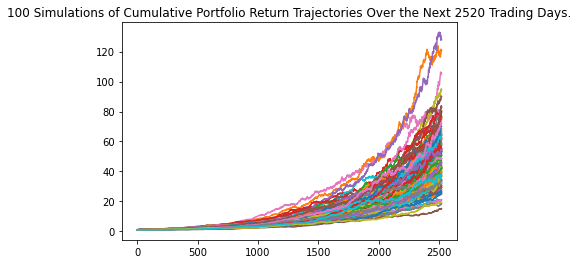

In [11]:
# Plot simulation outcomes
line_plot_RE_MC_10_years = RE_MC_10_years.plot_simulation()

# Save the plot for future usage
line_plot_RE_MC_10_years.get_figure().savefig("RE_MC_10_years_sim_plot.png", bbox_inches="tight")

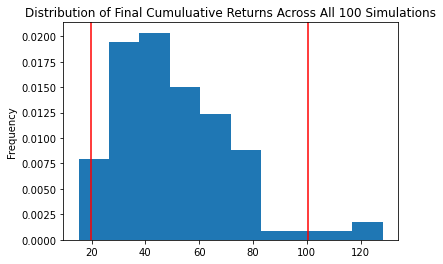

In [12]:
# Plot probability distribution and confidence intervals
dist_plot_RE_MC_10_years = RE_MC_10_years.plot_distribution()

# Save the plot for future usage
dist_plot_RE_MC_10_years.get_figure().savefig('RE_MC_10_years_dist_plot.png',bbox_inches='tight')

In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1REMC = RE_MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1REMC)

count           100.000000
mean             50.539661
std              21.211429
min              15.177426
25%              35.849021
50%              45.656501
75%              62.308678
max             128.222966
95% CI Lower     19.952208
95% CI Upper    100.479276
Name: 2520, dtype: float64


In [14]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_MC_10_years_lower = round(tbl_1REMC[8]*10000,2)
ci_RE_MC_10_years_upper = round(tbl_1REMC[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_RE_MC_10_years_lower} and ${ci_RE_MC_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $199522.08 and $1004792.76


#### WEIGHTED BY DIVIDEND YIELD

In [15]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_DY_10_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.11, 0.22, 0.03, 0.17, 0.31, 0.12, 0.04],
    num_simulation = 100,
    num_trading_days = 252*10)

In [16]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_DY_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001087,0.993612,1.004845,0.997544,1.001599,1.001601,0.993241,1.005492,0.997105,1.000739,...,1.004777,1.007553,0.999792,1.008463,0.992664,1.002473,1.002196,1.007339,1.012465,0.994615
2,1.010957,0.986795,0.998337,1.003437,1.003610,1.015715,0.998079,1.008937,1.010083,1.000777,...,1.002057,1.006400,0.998642,1.012594,1.001266,1.006152,1.005870,1.014706,1.018062,0.985386
3,1.009226,0.993230,0.995706,1.004960,1.005749,1.007576,0.999590,1.014468,1.018914,1.000617,...,1.002341,1.012429,0.996677,1.021132,1.000185,1.016623,1.004693,1.020073,1.020792,0.991438
4,1.011029,0.992227,0.999764,0.999607,1.024931,1.018787,0.994189,1.016650,1.017719,0.997490,...,1.010961,1.007357,1.006167,1.021561,0.999512,1.022736,1.009770,1.011078,1.016088,0.984466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,64.990162,54.469249,47.058576,68.955562,35.459221,34.909903,52.663618,66.732913,37.557116,49.767231,...,68.268676,45.826132,25.831067,65.227852,103.142801,106.402424,49.556047,57.448145,51.446260,57.272030
2517,64.977716,55.176399,47.243603,69.111492,35.382507,35.269891,52.846146,66.718373,38.156455,50.288760,...,68.388563,46.256534,26.173242,65.436610,103.339450,106.543262,49.477411,57.623041,51.717727,57.579887
2518,65.065923,55.391736,47.520872,69.654149,35.553726,35.211949,52.653043,66.897222,38.553306,50.435330,...,68.415195,46.152655,26.346668,65.743100,104.331306,106.482009,49.456748,57.652067,51.924965,57.829586
2519,64.939726,54.922383,47.314464,69.659328,35.686891,35.203793,53.417222,67.285519,38.564143,50.407573,...,68.500508,46.306866,26.581450,65.744727,104.167882,106.654116,49.655602,57.866108,51.525683,58.656812


In [17]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1REDY = RE_DY_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1REDY)

count           100.000000
mean             54.058615
std              15.699225
min              26.621142
25%              42.057400
50%              50.942285
75%              63.919017
max             106.637497
95% CI Lower     30.288986
95% CI Upper     89.171919
Name: 2520, dtype: float64


In [18]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_DY_10_years_lower = round(tbl_1REDY[8]*10000,2)
ci_RE_DY_10_years_upper = round(tbl_1REDY[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_RE_DY_10_years_lower} and ${ci_RE_DY_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $302889.86 and $891719.19


#### WEIGHTED BY 10 YEARS CUMULATED RETURNS

In [19]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_Ret_10_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.22, 0.16, 0.04, 0.25, 0.09, 0.14, 0.11],
    num_simulation = 100,
    num_trading_days = 252*10)

In [20]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_Ret_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002297,1.010506,1.003626,1.000889,0.994571,1.001937,0.997487,0.993325,1.001727,0.990331,...,0.999663,1.003333,1.004960,0.999850,1.001452,1.005792,0.998473,1.005288,1.004658,1.008834
2,1.002064,0.999303,1.006246,1.002478,1.000082,1.002464,0.995896,0.994748,0.997948,0.997975,...,0.997377,1.009025,1.016630,0.998369,0.998342,1.005556,0.995818,1.004359,1.004853,1.000594
3,1.003755,1.010999,1.008490,0.989457,1.006228,1.003528,0.997682,0.994236,1.004142,0.999031,...,1.010536,1.011955,1.015682,0.997894,0.996099,1.010890,1.001073,1.009677,1.010149,0.996424
4,1.014202,1.022217,1.016131,0.984933,1.008992,1.002363,1.000446,0.998699,1.011586,1.004302,...,1.006632,1.020710,1.011321,1.005363,0.991064,1.004802,1.001055,1.015446,1.009267,0.996407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,28.616582,41.793002,34.893794,36.998782,48.405065,31.828493,39.198798,54.467751,31.634503,57.511397,...,46.490449,51.267517,36.088199,41.671834,33.894467,38.308663,36.769511,52.802383,28.796616,47.854229
2517,28.882148,41.903275,34.764268,37.225723,48.761112,31.941540,38.901086,54.665676,31.900095,57.828998,...,46.948503,50.863522,36.056144,41.395607,34.138668,38.460305,36.907869,52.836346,28.889497,47.976187
2518,28.832476,42.120345,34.908449,37.278415,48.953701,31.918372,38.968836,55.061266,31.813281,57.554275,...,46.837971,50.324421,36.205244,41.570795,34.379557,38.308399,37.052589,53.194666,29.202770,47.858418
2519,28.896759,42.372780,35.028746,37.182133,48.935299,31.643134,38.962516,54.979593,31.736118,57.322348,...,46.802741,50.308535,36.394841,41.954131,34.565862,38.284667,36.963298,53.434062,29.108015,47.688543


In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1RERet = RE_Ret_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1RERet)

count           100.000000
mean             41.113725
std              10.824156
min              20.289133
25%              34.142044
50%              38.696503
75%              47.351067
max              75.187011
95% CI Lower     25.344096
95% CI Upper     67.093315
Name: 2520, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_Ret_10_years_lower = round(tbl_1RERet[8]*10000,2)
ci_RE_Ret_10_years_upper = round(tbl_1RERet[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_RE_Ret_10_years_lower} and ${ci_RE_Ret_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $253440.96 and $670933.15


### Simulate 5 years portfolio growth using Monte Carlo simulation

#### WEIGHTED BY MARKET CAPITAL

In [23]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_MC_5_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.16, 0.12, 0.26, 0.39, 0.02, 0.02, 0.02],
    num_simulation = 100,
    num_trading_days = 252*5)

In [24]:
# Printing the simulation input data
RE_MC_5_years.portfolio_data

BAM                                               \
                            open    high     low  close   volume daily_return   
time                                                                            
2019-08-09 00:00:00-04:00  50.27  51.030  50.120  50.88  1654827          NaN   
2019-08-12 00:00:00-04:00  50.79  51.160  50.490  50.53  1286362    -0.006879   
2019-08-13 00:00:00-04:00  50.38  51.140  50.230  51.04  1755703     0.010093   
2019-08-14 00:00:00-04:00  50.43  50.670  49.720  49.75  1954272    -0.025274   
2019-08-15 00:00:00-04:00  49.90  50.290  49.700  50.05  1380392     0.006030   
...                          ...     ...     ...    ...      ...          ...   
2019-12-24 00:00:00-05:00  57.57  57.670  57.120  57.63   529054     0.000521   
2019-12-26 00:00:00-05:00  57.77  58.000  57.550  57.92   451673     0.005032   
2019-12-27 00:00:00-05:00  58.20  58.230  57.740  58.08   695811     0.002762   
2019-12-30 00:00:00-05:00  58.08  58.130  57.610  57.82   853124    -0.004477   
2019-12-31 00:00:00-05:00  57.82  57.935  57.525  57.81  1000189    -0.000173   

                             ETN                         ...      OC         \
                            open    high     low  close  ...     low  close   
time                                                     ...                  
2019-08-09 00:00:00-04:00  79.30  79.710  78.260  79.05  ...  53.930  54.09   
2019-08-12 00:00:00-04:00  78.55  78.840  77.770  78.00  ...  53.110  53.50   
2019-08-13 00:00:00-04:00  78.02  80.370  77.620  79.42  ...  53.430  54.38   
2019-08-14 00:00:00-04:00  77.60  77.944  74.950  75.17  ...  52.990  53.59   
2019-08-15 00:00:00-04:00  75.28  76.070  74.860  75.89  ...  53.450  53.73   
...                          ...     ...     ...    ...  ...     ...    ...   
2019-12-24 00:00:00-05:00  95.36  95.360  94.300  94.50  ...  64.690  65.28   
2019-12-26 00:00:00-05:00  94.66  95.050  94.260  95.05  ...  64.880  65.26   
2019-12-27 00:00:00-05:00  95.34  95.390  94.830  95.00  ...  65.088  65.20   
2019-12-30 00:00:00-05:00  94.95  95.480  94.555  94.96  ...  64.710  64.75   
2019-12-31 00:00:00-05:00  94.78  95.290  94.410  94.70  ...  64.500  65.13   

                                                  ORA                    \
                           volume daily_return   open     high      low   
time                                                                      
2019-08-09 00:00:00-04:00  886463          NaN  68.25  71.6500  68.2500   
2019-08-12 00:00:00-04:00  427794    -0.010908  70.94  71.1800  70.1500   
2019-08-13 00:00:00-04:00  505103     0.016449  70.81  72.5800  70.8100   
2019-08-14 00:00:00-04:00  653853    -0.014527  71.69  72.3899  71.0000   
2019-08-15 00:00:00-04:00  834090     0.002612  71.39  72.4900  71.3900   
...                           ...          ...    ...      ...      ...   
2019-12-24 00:00:00-05:00  227221     0.004308  75.13  75.4100  74.6000   
2019-12-26 00:00:00-05:00  267116    -0.000306  74.30  74.6500  74.1383   
2019-12-27 00:00:00-05:00  275825    -0.000919  74.73  74.8900  74.3600   
2019-12-30 00:00:00-05:00  252494    -0.006902  75.33  75.4600  74.5250   
2019-12-31 00:00:00-05:00  351312     0.005869  74.98  75.3400  74.2700   

                                                        
                            close  volume daily_return  
time                                                    
2019-08-09 00:00:00-04:00  71.230  231516          NaN  
2019-08-12 00:00:00-04:00  70.810  102425    -0.005896  
2019-08-13 00:00:00-04:00  72.210  192443     0.019771  
2019-08-14 00:00:00-04:00  71.610  147757    -0.008309  
2019-08-15 00:00:00-04:00  72.330  114826     0.010054  
...                           ...     ...          ...  
2019-12-24 00:00:00-05:00  74.805   34109     0.000870  
2019-12-26 00:00:00-05:00  74.520   67426    -0.003810  
2019-12-27 00:00:00-05:00  74.510   53507    -0.000134  
2019-12-30 00:00:00-05:00  75.100   74016     0.0079

In [25]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982904,1.014431,1.003372,1.001278,0.998650,1.012554,0.995570,1.011550,1.002915,0.995274,...,0.999041,1.013305,1.002521,1.010820,1.000624,1.003207,1.005913,1.001688,1.002236,1.001823
2,0.979503,1.008575,1.001831,0.996238,1.005293,1.020403,0.994061,1.018146,0.997134,0.992578,...,1.002371,1.019812,1.000353,1.016533,0.992662,1.010903,1.005648,0.999635,0.979981,0.998390
3,0.991543,1.000769,1.007234,1.001267,1.014795,1.024806,0.983987,0.999948,0.990473,1.004669,...,1.015428,1.028007,0.999487,1.026096,0.998314,1.026878,1.019720,0.999696,0.986887,0.999133
4,1.003799,1.018668,1.008199,1.001929,1.022279,1.000685,0.986430,1.002970,0.993427,1.010318,...,1.026698,1.026406,0.999222,1.027479,1.014009,1.037724,1.004344,1.005964,0.995241,1.012089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,7.077121,10.867371,8.346098,3.865822,12.597699,7.467545,8.876824,7.337939,11.817153,6.526452,...,7.273713,5.944731,6.559966,7.727253,9.516056,5.418702,6.632067,6.149740,5.255427,10.671920
1257,7.116667,10.821724,8.327660,3.876955,12.587248,7.449110,8.909833,7.315055,11.771249,6.482602,...,7.321576,5.931459,6.459989,7.715035,9.451023,5.384211,6.637563,6.144408,5.262231,10.636007
1258,7.184949,10.837615,8.371466,3.884107,12.583931,7.415958,8.906220,7.419705,11.708511,6.557184,...,7.329390,5.947003,6.615721,7.743999,9.440228,5.392931,6.730234,6.145896,5.243177,10.746670
1259,7.175677,10.830142,8.442166,3.887670,12.655034,7.424104,8.835246,7.436558,11.725848,6.584872,...,7.388922,5.991252,6.682372,7.836277,9.345516,5.431750,6.682465,6.255207,5.177940,10.828469


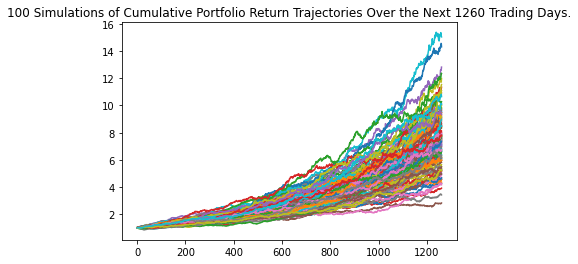

In [26]:
# Plot simulation outcomes
line_plot_RE_MC_5_years = RE_MC_5_years.plot_simulation()

# Save the plot for future usage
line_plot_RE_MC_5_years.get_figure().savefig("RE_MC_5_years_sim_plot.png", bbox_inches="tight")

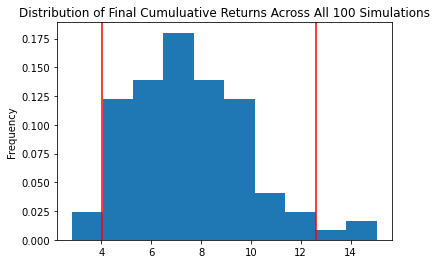

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_RE_MC_5_years = RE_MC_5_years.plot_distribution()

# Save the plot for future usage
dist_plot_RE_MC_5_years.get_figure().savefig('RE_MC_5_years_dist_plot.png',bbox_inches='tight')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2RE = RE_MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2RE)

count           100.000000
mean              7.541987
std               2.334893
min               2.824927
25%               5.970889
50%               7.403492
75%               8.999674
max              15.044775
95% CI Lower      4.040039
95% CI Upper     12.594446
Name: 1260, dtype: float64


In [29]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_MC_5_years_lower = round(tbl_2RE[8]*10000,2)
ci_RE_MC_5_years_upper = round(tbl_2RE[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_RE_MC_5_years_lower} and ${ci_RE_MC_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $40400.39 and $125944.46


#### WEIGHTED BY DIVIDEND YIELD

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_DY_5_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.11, 0.22, 0.03, 0.17, 0.31, 0.12, 0.04],
    num_simulation = 100,
    num_trading_days = 252*5)

In [31]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_DY_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993434,0.998981,1.003649,1.000505,0.992536,1.010265,0.998588,0.999639,1.002692,0.992974,...,0.994643,0.995498,1.017015,0.991849,1.005029,0.999054,0.997545,1.001383,1.003706,1.005925
2,0.997339,0.998201,1.008187,0.999005,0.985573,1.006471,0.993723,1.008971,1.000658,0.994639,...,1.001927,0.999951,1.018104,0.990612,1.003019,1.002121,0.994553,0.996534,1.005083,1.010635
3,1.001506,0.990366,1.007817,0.990316,0.996778,1.012066,0.999122,0.999272,0.999812,0.995748,...,1.010404,0.997279,1.020327,0.986334,1.012527,0.999427,0.991969,0.994701,0.997226,1.012792
4,1.017094,0.996274,1.017353,0.993818,0.999632,1.018641,1.001580,1.006417,0.993340,0.996074,...,1.014602,0.996614,1.016726,0.987058,1.016069,0.997541,0.989157,0.988801,1.007073,1.006672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,7.472887,7.009237,7.397968,6.987880,4.837988,8.288093,5.961926,6.433968,8.196088,6.496533,...,7.743842,6.518138,6.204600,6.757209,6.938073,7.415418,5.457376,5.566930,6.709483,6.855270
1257,7.504695,7.055573,7.422847,6.934551,4.845668,8.302376,5.985818,6.519421,8.269042,6.495967,...,7.758411,6.555267,6.234535,6.821714,6.948168,7.404769,5.494770,5.546227,6.729139,6.883878
1258,7.523972,7.082991,7.379735,6.881991,4.880243,8.261706,5.998815,6.504231,8.291558,6.493607,...,7.695461,6.578752,6.230091,6.780398,6.910924,7.495730,5.488850,5.487878,6.713409,6.872118
1259,7.567132,7.088744,7.385282,6.888652,4.912066,8.291484,5.996916,6.494589,8.271481,6.465557,...,7.712000,6.569839,6.203596,6.751211,6.967231,7.510159,5.499153,5.533503,6.751510,6.901413


In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2REDY = RE_DY_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2REDY)

count           100.000000
mean              7.069082
std               1.249197
min               4.123473
25%               6.330047
50%               6.998661
75%               7.805367
max              12.203267
95% CI Lower      4.887296
95% CI Upper      9.251742
Name: 1260, dtype: float64


In [33]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_DY_5_years_lower = round(tbl_2REDY[8]*10000,2)
ci_RE_DY_5_years_upper = round(tbl_2REDY[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_RE_DY_5_years_lower} and ${ci_RE_DY_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $48872.96 and $92517.42


#### WEIGHTED BY 10 YEARS CUMULATED RETURNS

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_Ret_5_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.22, 0.16, 0.04, 0.25, 0.09, 0.14, 0.11],
    num_simulation = 100,
    num_trading_days = 252*5)

In [35]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_Ret_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001403,1.006321,0.996998,1.005669,1.006903,0.988931,1.001257,1.001658,0.999020,1.001089,...,1.002333,1.009586,0.999446,0.997686,1.007618,1.005203,1.001364,1.007694,1.008137,1.004046
2,1.002061,1.005395,0.994694,1.011317,0.996966,1.000509,1.005048,0.991004,1.005720,1.000414,...,0.994306,1.014958,1.007841,0.998867,1.005327,1.001674,1.007603,1.009141,1.012100,1.008268
3,1.002723,0.998392,1.000873,1.013880,0.992693,1.005423,0.998277,0.993855,1.012849,1.002320,...,0.997217,1.006780,1.004905,1.000049,1.002223,1.005082,1.006203,1.011421,1.009169,1.015064
4,0.999721,0.998258,1.002066,1.013133,1.001508,0.999660,0.999037,0.993576,1.011456,0.992305,...,1.001107,1.013790,1.008928,1.009814,0.999203,1.010722,1.004196,1.016129,1.003182,1.018726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,8.168252,6.253838,5.011541,6.424893,5.705660,5.956789,5.281652,6.255162,5.583146,5.836371,...,6.170142,5.951117,5.584937,7.416888,7.279723,7.537106,6.347280,5.855327,5.232986,6.111271
1257,8.107466,6.254402,5.031706,6.462587,5.718724,5.974554,5.276632,6.275584,5.569363,5.867205,...,6.144640,5.956447,5.588848,7.478454,7.342071,7.539476,6.370459,5.881453,5.286076,6.149302
1258,8.070404,6.263826,5.044107,6.477699,5.733645,5.967668,5.293570,6.233372,5.585062,5.886133,...,6.101618,5.946649,5.587458,7.476397,7.378720,7.461179,6.370737,5.903563,5.307723,6.150474
1259,8.168878,6.282174,5.024466,6.469917,5.766239,5.952052,5.288899,6.273546,5.566574,5.945536,...,6.123950,5.905508,5.595335,7.473196,7.385139,7.469500,6.415541,5.906422,5.306542,6.131317


In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2RERet = RE_Ret_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2RERet)

count           100.000000
mean              6.283528
std               0.950978
min               4.352783
25%               5.584503
50%               6.216926
75%               6.956718
max               9.310704
95% CI Lower      4.519485
95% CI Upper      8.141214
Name: 1260, dtype: float64


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_Ret_5_years_lower = round(tbl_2RERet[8]*10000,2)
ci_RE_Ret_5_years_upper = round(tbl_2RERet[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_RE_Ret_5_years_lower} and ${ci_RE_Ret_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $45194.85 and $81412.14


### Simulate 15 years portfolio growth using Monte Carlo simulation

#### WEIGHTED BY MARKET CAPITAL

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_MC_15_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.16, 0.12, 0.26, 0.39, 0.02, 0.02, 0.02],
    num_simulation = 100,
    num_trading_days = 252*15)

In [39]:
# Printing the simulation input data
RE_MC_15_years.portfolio_data

BAM                                               \
                            open    high     low  close   volume daily_return   
time                                                                            
2019-08-09 00:00:00-04:00  50.27  51.030  50.120  50.88  1654827          NaN   
2019-08-12 00:00:00-04:00  50.79  51.160  50.490  50.53  1286362    -0.006879   
2019-08-13 00:00:00-04:00  50.38  51.140  50.230  51.04  1755703     0.010093   
2019-08-14 00:00:00-04:00  50.43  50.670  49.720  49.75  1954272    -0.025274   
2019-08-15 00:00:00-04:00  49.90  50.290  49.700  50.05  1380392     0.006030   
...                          ...     ...     ...    ...      ...          ...   
2019-12-24 00:00:00-05:00  57.57  57.670  57.120  57.63   529054     0.000521   
2019-12-26 00:00:00-05:00  57.77  58.000  57.550  57.92   451673     0.005032   
2019-12-27 00:00:00-05:00  58.20  58.230  57.740  58.08   695811     0.002762   
2019-12-30 00:00:00-05:00  58.08  58.130  57.610  57.82   853124    -0.004477   
2019-12-31 00:00:00-05:00  57.82  57.935  57.525  57.81  1000189    -0.000173   

                             ETN                         ...      OC         \
                            open    high     low  close  ...     low  close   
time                                                     ...                  
2019-08-09 00:00:00-04:00  79.30  79.710  78.260  79.05  ...  53.930  54.09   
2019-08-12 00:00:00-04:00  78.55  78.840  77.770  78.00  ...  53.110  53.50   
2019-08-13 00:00:00-04:00  78.02  80.370  77.620  79.42  ...  53.430  54.38   
2019-08-14 00:00:00-04:00  77.60  77.944  74.950  75.17  ...  52.990  53.59   
2019-08-15 00:00:00-04:00  75.28  76.070  74.860  75.89  ...  53.450  53.73   
...                          ...     ...     ...    ...  ...     ...    ...   
2019-12-24 00:00:00-05:00  95.36  95.360  94.300  94.50  ...  64.690  65.28   
2019-12-26 00:00:00-05:00  94.66  95.050  94.260  95.05  ...  64.880  65.26   
2019-12-27 00:00:00-05:00  95.34  95.390  94.830  95.00  ...  65.088  65.20   
2019-12-30 00:00:00-05:00  94.95  95.480  94.555  94.96  ...  64.710  64.75   
2019-12-31 00:00:00-05:00  94.78  95.290  94.410  94.70  ...  64.500  65.13   

                                                  ORA                    \
                           volume daily_return   open     high      low   
time                                                                      
2019-08-09 00:00:00-04:00  886463          NaN  68.25  71.6500  68.2500   
2019-08-12 00:00:00-04:00  427794    -0.010908  70.94  71.1800  70.1500   
2019-08-13 00:00:00-04:00  505103     0.016449  70.81  72.5800  70.8100   
2019-08-14 00:00:00-04:00  653853    -0.014527  71.69  72.3899  71.0000   
2019-08-15 00:00:00-04:00  834090     0.002612  71.39  72.4900  71.3900   
...                           ...          ...    ...      ...      ...   
2019-12-24 00:00:00-05:00  227221     0.004308  75.13  75.4100  74.6000   
2019-12-26 00:00:00-05:00  267116    -0.000306  74.30  74.6500  74.1383   
2019-12-27 00:00:00-05:00  275825    -0.000919  74.73  74.8900  74.3600   
2019-12-30 00:00:00-05:00  252494    -0.006902  75.33  75.4600  74.5250   
2019-12-31 00:00:00-05:00  351312     0.005869  74.98  75.3400  74.2700   

                                                        
                            close  volume daily_return  
time                                                    
2019-08-09 00:00:00-04:00  71.230  231516          NaN  
2019-08-12 00:00:00-04:00  70.810  102425    -0.005896  
2019-08-13 00:00:00-04:00  72.210  192443     0.019771  
2019-08-14 00:00:00-04:00  71.610  147757    -0.008309  
2019-08-15 00:00:00-04:00  72.330  114826     0.010054  
...                           ...     ...          ...  
2019-12-24 00:00:00-05:00  74.805   34109     0.000870  
2019-12-26 00:00:00-05:00  74.520   67426    -0.003810  
2019-12-27 00:00:00-05:00  74.510   53507    -0.000134  
2019-12-30 00:00:00-05:00  75.100   74016     0.0079

In [40]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_MC_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999177,1.008439,1.007495,0.990857,1.006138,1.008731,0.997883,1.011615,1.013260,1.004544,...,1.009953,1.006791,0.997568,0.995693,1.007751,0.982350,0.986331,1.000323,0.994656,1.008325
2,0.999260,1.009155,1.023526,0.992766,1.015960,1.017017,0.995432,1.017258,1.015332,0.991767,...,1.014826,0.999213,0.994672,0.997799,1.004404,0.979835,0.984839,1.004088,0.979506,1.012779
3,1.001583,0.999838,1.042111,1.005467,1.021643,1.020319,0.993585,1.015929,1.028335,1.001779,...,1.011060,0.982233,0.985715,0.995261,1.000629,0.985783,0.985665,0.991812,0.977054,1.013076
4,1.005273,1.000771,1.060227,1.009438,1.034023,1.029385,0.991838,1.010673,1.029845,0.990210,...,1.023098,0.991550,0.987838,0.987801,1.007498,0.981154,0.994120,0.994625,0.978528,1.021783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,681.059604,127.864912,240.712145,239.665960,742.219430,390.281615,211.521919,413.868682,442.236124,265.221436,...,495.722991,576.205743,261.980343,209.622146,318.004620,466.611086,376.195130,143.961629,543.011155,355.969318
3777,676.698424,128.415070,240.835568,240.557159,745.580739,392.269961,210.100605,409.135023,442.501131,264.681359,...,497.102805,584.587063,261.809629,212.929385,321.411514,463.477144,377.940521,145.058564,538.644736,355.774602
3778,680.124155,127.404383,240.572096,241.364429,743.840699,397.518056,213.441643,406.214245,444.075285,265.323656,...,500.544433,594.841086,263.309551,212.599116,318.577881,470.796208,380.923828,147.319514,533.929878,354.897833
3779,678.603176,127.455432,241.126783,243.131975,744.810120,397.947883,215.096322,405.279417,445.799949,262.010345,...,501.920347,588.166836,264.229938,212.389932,318.477570,467.103273,383.834425,148.089756,531.034520,354.683572


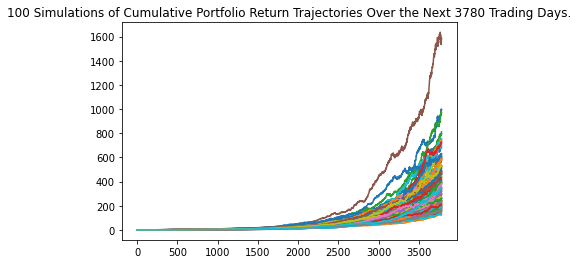

In [41]:
# Plot simulation outcomes
line_plot_RE_MC_15_years = RE_MC_15_years.plot_simulation()

# Save the plot for future usage
line_plot_RE_MC_15_years.get_figure().savefig("RE_MC_15_years_sim_plot.png", bbox_inches="tight")

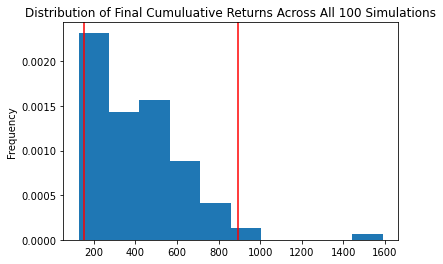

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_RE_MC_15_years = RE_MC_15_years.plot_distribution()

# Save the plot for future usage
dist_plot_RE_MC_15_years.get_figure().savefig('RE_MC_15_years_dist_plot.png',bbox_inches='tight')

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3REMC = RE_MC_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3REMC)

count            100.000000
mean             416.795556
std              225.394449
min              126.059692
25%              241.129520
50%              387.205584
75%              525.789011
max             1590.175718
95% CI Lower     153.519272
95% CI Upper     892.442021
Name: 3780, dtype: float64


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_MC_15_years_lower = round(tbl_3REMC[8]*10000,2)
ci_RE_MC_15_years_upper = round(tbl_3REMC[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_RE_MC_15_years_lower} and ${ci_RE_MC_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $1535192.72 and $8924420.21


#### WEIGHTED BY DIVIDEND YIELD

In [45]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_DY_15_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.11, 0.22, 0.03, 0.17, 0.31, 0.12, 0.04],
    num_simulation = 100,
    num_trading_days = 252*15)

In [46]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_DY_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998306,0.996802,1.004325,1.010398,1.000063,1.003015,1.006581,1.003250,1.000759,1.002153,...,1.001313,1.007380,0.996750,0.991560,0.994947,1.012369,1.005595,0.994963,1.007688,0.993510
2,0.996832,1.003767,1.009508,1.000690,0.993208,0.998540,1.006177,1.006739,0.996609,1.001567,...,1.000688,1.015947,0.992057,0.987180,0.993209,1.019216,1.001598,0.998742,0.999703,0.993825
3,1.006039,1.005638,1.011041,0.999386,0.999203,0.991565,1.009363,1.001187,0.998911,1.013430,...,1.005700,1.015369,0.998656,0.990666,0.997061,1.024792,1.004896,1.008515,0.997218,0.987191
4,1.004522,1.001030,1.017499,0.997351,1.002125,0.996817,1.008200,1.008272,1.011563,1.006535,...,1.002944,1.016789,0.992325,0.987326,0.995798,1.023987,1.004334,1.003363,0.995620,0.988659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,448.896025,350.740525,456.138106,180.086947,532.810211,836.245169,511.468187,447.727042,452.858325,413.963705,...,280.074054,343.314361,386.638260,469.834001,498.675093,275.837215,496.177931,618.168511,550.436153,290.829274
3777,449.317480,352.652552,459.222970,181.006285,534.401342,833.198375,509.583636,444.453975,450.039504,414.578440,...,280.900116,343.071689,389.037808,469.147216,498.192934,274.890404,497.503655,620.709764,554.722123,288.663286
3778,450.206693,352.229195,461.274094,180.187250,541.271400,843.428605,513.895020,446.857917,451.945644,416.635820,...,282.937297,342.160349,389.867925,464.488393,497.966500,278.085668,494.129725,627.586811,548.539580,289.181836
3779,450.436812,353.724010,460.718665,179.990976,539.911371,840.110917,514.598850,449.591419,452.202046,417.411703,...,282.088856,344.033758,389.208452,465.651942,496.784874,278.601371,493.558760,629.776134,550.686943,288.635249


In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3REDY = RE_DY_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3REDY)

count           100.000000
mean            414.925312
std             158.704443
min             119.580846
25%             304.015403
50%             380.133798
75%             511.720916
max             845.837291
95% CI Lower    184.051203
95% CI Upper    778.591980
Name: 3780, dtype: float64


In [48]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_DY_15_years_lower = round(tbl_3REDY[8]*10000,2)
ci_RE_DY_15_years_upper = round(tbl_3REDY[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_RE_DY_15_years_lower} and ${ci_RE_DY_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $1840512.03 and $7785919.8


#### WEIGHTED BY 10 YEARS CUMULATED RETURNS

In [49]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns WEIGHTED BY MARKET CAPITAL
RE_Ret_15_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [0.22, 0.16, 0.04, 0.25, 0.09, 0.14, 0.11],
    num_simulation = 100,
    num_trading_days = 252*15)

In [50]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_Ret_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000113,1.001881,0.996494,1.001146,0.996878,0.999644,0.987008,1.000991,1.011784,0.994683,...,1.000409,1.005433,1.002157,1.004534,0.995696,1.004191,0.992240,1.000618,1.003049,0.998165
2,1.004212,1.005584,0.994391,1.007604,0.991842,1.006863,0.990029,1.006999,1.012626,0.983052,...,0.997195,0.996519,1.003922,1.010452,0.996622,1.003932,0.996163,0.992259,1.007634,0.992427
3,1.005963,1.005664,0.993041,1.012346,0.991063,1.001013,0.990052,1.015758,1.022271,0.992515,...,1.004316,0.992382,0.997360,1.007744,1.000553,1.006931,1.001228,0.994642,1.016630,0.992764
4,1.004112,1.003091,1.002246,1.016772,0.992333,1.002153,1.001027,1.015805,1.025812,0.984208,...,1.006549,0.985353,0.999203,1.010370,0.999025,1.009299,0.998946,1.002546,1.022324,0.987946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,372.496052,350.500359,252.917149,214.382839,261.640871,241.279594,225.465334,299.414698,330.569968,231.173566,...,330.131316,200.663759,207.335368,315.201249,184.082523,165.640433,319.632883,203.801751,108.856409,257.183336
3777,375.988370,349.932871,253.071309,214.948477,262.519649,240.157646,226.491247,299.725433,332.632527,231.324665,...,330.500299,201.749646,206.684564,314.190748,184.890804,165.446198,318.451661,203.838014,109.404846,256.752306
3778,376.895535,350.249583,254.430798,215.653266,262.127587,241.615726,227.079800,302.302813,331.285333,233.230756,...,332.263359,201.941781,206.855903,315.542351,185.189317,163.943344,317.584168,204.720591,109.652846,257.764088
3779,378.118943,349.579719,254.378165,216.486861,261.924740,241.670253,226.626333,300.546821,334.107404,232.423790,...,333.630301,203.312436,207.986754,315.460040,185.002976,164.253697,318.807819,203.236450,108.835824,257.580172


In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3RERet = RE_Ret_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3RERet)

count           100.000000
mean            256.268522
std              86.011351
min             109.619577
25%             198.857589
50%             238.876456
75%             301.219875
max             601.948459
95% CI Lower    140.305577
95% CI Upper    496.441355
Name: 3780, dtype: float64


In [52]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_Ret_15_years_lower = round(tbl_3RERet[8]*10000,2)
ci_RE_Ret_15_years_upper = round(tbl_3RERet[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_RE_Ret_15_years_lower} and ${ci_RE_Ret_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $1403055.77 and $4964413.55


### Simulate 10, 20 and 30 years portfolio growth using Monte Carlo simulation, weighted iqualy

#### MonteCarlo 10 Years simulation

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns 
RE_10_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
    num_simulation = 100,
    num_trading_days = 252*10)

In [54]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004964,0.997829,1.010465,0.999646,1.008312,1.002959,1.002406,0.999985,0.997641,1.008426,...,0.993919,0.995451,1.020916,1.002712,1.000114,0.998419,1.002183,1.006443,0.990736,1.009153
2,1.011711,1.001096,1.012915,0.991414,1.018361,1.008581,1.010667,1.000197,0.993649,1.000055,...,0.990925,0.991322,1.024346,1.004019,1.009332,1.005596,0.998176,1.001832,0.984977,1.000457
3,1.016315,1.005246,1.009769,0.989710,1.018517,1.002310,1.009315,1.000511,1.000668,1.016041,...,0.997622,0.984009,1.028646,1.006375,1.013533,1.012180,0.991193,1.012090,0.989095,1.003598
4,1.015325,1.003499,1.011775,0.990221,1.018221,1.003536,1.014609,1.007663,1.008276,1.018946,...,0.998332,0.982487,1.033446,1.010931,1.013134,1.011373,0.994922,1.019178,0.988192,0.996289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,83.743792,54.156956,34.795787,59.031182,32.648362,46.229395,65.885946,44.180307,89.933824,81.392455,...,40.389301,65.031830,52.584881,63.613307,63.782768,30.008380,49.048110,34.521793,58.489634,46.217715
2517,83.900529,54.669879,34.952677,59.223545,32.575322,46.400402,65.958598,44.317361,90.148898,81.247170,...,40.401531,65.263985,52.616895,63.407531,63.938894,30.120007,49.458092,34.086197,58.108560,46.254508
2518,84.362222,55.088241,35.067663,59.420443,32.598751,46.005859,66.277177,44.645101,90.263582,82.618171,...,40.408432,65.718240,52.582352,63.676470,63.800911,29.998086,49.288667,34.350366,58.065053,46.472992
2519,84.204481,54.977879,35.465155,59.184048,32.680629,45.951796,66.729084,44.657229,90.835841,82.443300,...,40.251800,65.593041,52.630468,63.259368,63.949161,30.042220,49.953849,34.232523,58.482141,46.374260


In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1RE = RE_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1RE)

count           100.000000
mean             49.858655
std              15.835741
min              21.821789
25%              38.027069
50%              46.624322
75%              59.689173
max             105.109824
95% CI Lower     26.915319
95% CI Upper     87.309063
Name: 2520, dtype: float64


In [56]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_10_years_lower = round(tbl_1RE[8]*10000,2)
ci_RE_10_years_upper = round(tbl_1RE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_RE_10_years_lower} and ${ci_RE_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $269153.19 and $873090.63


#### MonteCarlo 5 Years simulation

In [57]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns 
RE_5_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
    num_simulation = 100,
    num_trading_days = 252*5)

In [58]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003033,1.003415,0.993355,0.992494,0.997093,1.008761,0.994456,0.998891,0.991968,0.996411,...,1.003103,0.995948,1.012632,1.005286,0.998213,1.002390,1.012083,1.008730,1.001991,1.000549
2,1.005744,1.004958,0.998804,0.998301,1.000698,1.011307,0.995373,0.988657,1.000965,1.002394,...,1.011780,0.990723,1.009602,1.002988,1.003916,1.001540,1.021717,1.008768,1.005296,0.993841
3,1.003427,0.999834,1.000856,0.997314,0.999861,0.999809,0.996957,0.994175,1.001409,1.002112,...,1.016724,0.995424,1.013497,0.999865,1.005205,1.006778,1.031492,1.015387,1.012037,1.000457
4,1.013783,1.003196,1.006659,0.999088,1.012678,1.006993,0.996634,0.989838,1.005221,0.998683,...,1.022750,0.999033,1.017900,1.001429,1.004950,1.009910,1.031517,1.014084,1.016462,1.008712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,7.446977,8.435293,6.842097,6.211327,5.695940,6.575630,7.346617,7.087237,8.549725,6.111071,...,6.961046,7.812509,7.015967,5.604685,8.702076,6.533744,7.199342,5.825071,5.640972,7.841085
1257,7.420040,8.476053,6.845062,6.223826,5.721258,6.585146,7.334023,7.094121,8.647961,6.160092,...,6.981039,7.789037,7.062082,5.618158,8.689903,6.563668,7.252534,5.820639,5.675431,7.863981
1258,7.473136,8.504126,6.893766,6.219569,5.786222,6.590646,7.343633,7.100383,8.696542,6.209392,...,7.022744,7.764496,7.017284,5.668572,8.746162,6.611784,7.263714,5.819257,5.682246,7.853400
1259,7.526836,8.459464,6.954132,6.162470,5.808717,6.647216,7.341760,7.126181,8.760767,6.213031,...,7.048238,7.857327,6.974877,5.621690,8.829631,6.648943,7.296430,5.845732,5.670677,7.894849


In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2RE = RE_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2RE)

count           100.000000
mean              7.182708
std               1.357129
min               4.203590
25%               6.335955
50%               7.164822
75%               8.044937
max              11.508260
95% CI Lower      4.542561
95% CI Upper     10.035634
Name: 1260, dtype: float64


In [60]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_5_years_lower = round(tbl_2RE[8]*10000,2)
ci_RE_5_years_upper = round(tbl_2RE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_RE_5_years_lower} and ${ci_RE_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $45425.61 and $100356.34


#### MonteCarlo 15 Years simulation

In [61]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns 
RE_15_years = MCSimulation(
    portfolio_data = ALTERNATIVE_RE,
    weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
    num_simulation = 100,
    num_trading_days = 252*15)

In [62]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
RE_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996103,1.001257,0.997486,1.005271,1.002519,0.997495,0.993663,1.002129,1.006960,1.008758,...,1.000474,1.010554,1.001574,1.007419,1.008447,1.002235,1.002907,1.003246,1.003956,0.996058
2,0.996037,0.999560,1.006766,1.006271,1.007773,0.997553,1.002704,1.003178,0.998997,1.001773,...,1.000061,1.012581,1.004277,1.005095,1.012998,1.001290,0.996429,1.006034,1.002727,0.996046
3,0.994430,1.008579,1.001949,1.005834,1.009224,1.015244,0.990578,1.001129,0.994517,0.997756,...,1.004998,1.017360,1.001836,1.003384,1.018128,0.990419,0.990901,1.011385,0.998017,1.000401
4,0.986748,1.010264,1.003986,0.998877,1.008832,1.009820,0.993720,1.003023,0.994769,0.996523,...,0.998964,1.018191,1.008401,1.008163,1.026151,0.984369,0.990623,1.023499,1.012064,0.995743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,203.400131,324.986847,728.383282,509.583582,348.227947,408.509860,418.017479,568.918196,420.479773,292.586134,...,261.825774,283.204674,425.476828,198.401334,235.064816,370.290964,331.416085,196.664704,230.080758,264.701243
3777,204.281507,328.139846,728.905019,510.293094,347.800666,407.630031,419.234036,574.430774,420.028393,293.667924,...,260.682073,285.002335,426.967578,201.319061,235.776698,371.774160,330.410886,197.164142,230.349858,265.129119
3778,204.172219,328.761660,732.081510,513.032967,345.029378,408.831073,419.623397,574.402196,425.197160,293.443026,...,260.062337,284.833305,427.806646,202.113876,235.725078,369.391682,333.066004,198.569480,230.655555,264.864359
3779,205.111406,330.492309,735.377003,515.979499,344.728731,414.252930,420.943140,579.729362,422.604233,293.536124,...,261.246583,286.095858,427.909095,203.161514,235.975527,371.319960,332.460272,197.760832,230.365883,264.354326


In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3RE = RE_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3RE)

count           100.000000
mean            344.812323
std             124.442985
min             156.572640
25%             256.044450
50%             327.395061
75%             401.527202
max             840.814105
95% CI Lower    177.705238
95% CI Upper    611.344979
Name: 3780, dtype: float64


In [64]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_RE_15_years_lower = round(tbl_3RE[8]*10000,2)
ci_RE_15_years_upper = round(tbl_3RE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_RE_15_years_lower} and ${ci_RE_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $1777052.38 and $6113449.79


### S&P 500 Simulate 5, 10 and 15 years portfolio growth using Monte Carlo simulation, weighted iqualy

In [65]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['SPY']

# Get 10 year's worth of historical price data 
SPY = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
SPY.head()

SPY                                     
                             open      high     low   close     volume
time                                                                  
2019-08-09 00:00:00-04:00  292.58  293.2400  289.65  291.59   79060953
2019-08-12 00:00:00-04:00  289.96  291.6052  287.02  288.10   55499992
2019-08-13 00:00:00-04:00  287.74  294.1500  287.36  292.43   82355835
2019-08-14 00:00:00-04:00  288.07  292.4644  283.76  283.92  114406673
2019-08-15 00:00:00-04:00  284.88  285.6400  282.39  284.69   82311442

In [66]:
SPY.isnull().sum()

SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [67]:
SPY.dropna()

SPY                                     
                             open      high     low   close     volume
time                                                                  
2019-08-09 00:00:00-04:00  292.58  293.2400  289.65  291.59   79060953
2019-08-12 00:00:00-04:00  289.96  291.6052  287.02  288.10   55499992
2019-08-13 00:00:00-04:00  287.74  294.1500  287.36  292.43   82355835
2019-08-14 00:00:00-04:00  288.07  292.4644  283.76  283.92  114406673
2019-08-15 00:00:00-04:00  284.88  285.6400  282.39  284.69   82311442
...                           ...       ...     ...     ...        ...
2019-12-24 00:00:00-05:00  321.47  321.5200  320.90  321.26   16067681
2019-12-26 00:00:00-05:00  321.65  322.9300  321.64  322.91   27114092
2019-12-27 00:00:00-05:00  323.74  323.8000  322.28  322.86   35123062
2019-12-30 00:00:00-05:00  322.95  323.1000  320.55  321.10   41848090
2019-12-31 00:00:00-05:00  320.53  322.1300  320.15  321.89   38134256

[100 rows x 5 columns]

#### MonteCarlo 10 Years simulation

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns 
SPY_10_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*10)

In [69]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995221,0.999649,0.991755,0.994289,1.011382,1.000077,1.004527,1.005410,0.991079,1.008168,...,1.000746,1.005862,1.010452,1.013122,0.990713,1.000568,1.006409,1.002751,0.988071,0.997342
2,1.000089,0.996972,0.991617,1.002560,1.014384,0.992539,0.995223,0.990581,0.997605,1.009716,...,1.008583,1.016227,1.015798,1.011855,0.991063,1.010086,1.006459,1.000756,0.980190,0.997063
3,1.000125,1.007158,0.991610,1.005266,1.018564,0.998500,0.999504,0.990716,0.986879,1.018798,...,1.008484,1.024152,1.027436,1.025962,0.987349,1.008386,0.998111,0.997940,0.983120,1.000619
4,0.995663,1.008923,0.994074,1.002184,1.029428,0.992190,0.991536,0.989164,0.980954,1.021521,...,1.003320,1.028661,1.026148,1.037567,0.979930,1.007414,0.991916,0.996070,0.986941,1.008758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,10.049154,7.765076,8.591005,17.219899,24.370673,9.628328,14.435184,19.415710,11.182133,10.343803,...,14.992005,10.900119,14.725415,18.952854,13.807328,13.067790,17.293406,13.993383,19.175963,13.695042
2517,10.050461,7.784043,8.686051,17.392005,24.388570,9.559497,14.505011,19.283865,11.220110,10.362153,...,15.130378,10.832563,14.860933,18.878938,13.731097,13.021804,17.492068,13.814100,19.163345,13.754444
2518,10.044629,7.757410,8.694657,17.483365,24.683224,9.537512,14.461528,19.361614,11.230389,10.370944,...,15.040129,10.902870,14.754592,18.998645,13.634364,13.125257,17.766451,13.984458,19.257838,13.794551
2519,10.207441,7.859789,8.846373,17.466771,24.744575,9.518812,14.677943,19.528492,11.220476,10.570803,...,15.117166,10.975865,14.734398,19.164590,13.628083,13.172551,17.727257,13.985213,19.028870,13.919188


In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1SPY_10_years = SPY_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1SPY_10_years)

count           100.000000
mean             13.156955
std               4.844347
min               5.940939
25%               9.933594
50%              12.164811
75%              15.094632
max              31.247311
95% CI Lower      6.670694
95% CI Upper     23.479494
Name: 2520, dtype: float64


In [71]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_10_years_lower = round(tbl_1SPY_10_years[8]*10000,2)
ci_SPY_10_years_upper = round(tbl_1SPY_10_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_SPY_10_years_lower} and ${ci_SPY_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $66706.94 and $234794.94


#### MonteCarlo 5 Years simulation

In [72]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns 
SPY_5_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*5)

In [73]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981294,0.996208,0.988408,1.003639,1.003400,0.988308,0.993333,1.005334,0.994874,1.008588,...,0.987183,1.002519,0.993914,1.011638,0.998705,1.004101,0.990028,1.001338,0.999016,0.996086
2,0.988074,0.989784,0.995131,1.002114,1.012107,0.994769,1.001062,1.004487,0.991742,1.008296,...,0.993191,0.985368,1.007099,1.020233,1.010312,1.010092,0.990802,0.997768,1.018633,1.000109
3,0.991850,0.993578,0.982514,1.012227,1.017324,0.996470,1.004672,1.008781,1.002190,0.998408,...,1.008799,0.992715,1.013304,1.027302,1.015256,1.014986,0.991684,1.001878,1.020895,1.002215
4,0.997943,0.990749,0.993544,1.009321,1.021770,0.997568,1.008505,1.001322,1.010920,0.995997,...,1.016897,0.987950,1.018841,1.021563,1.017271,1.013251,0.988278,0.991419,1.026600,1.023205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.569043,4.546549,3.853377,3.327454,3.533646,2.757723,3.269006,3.302252,4.918328,1.900022,...,3.011087,2.653655,4.095432,4.605129,2.823552,3.177678,3.644125,1.644994,4.818003,4.128851
1257,4.548482,4.540731,3.893014,3.345119,3.570955,2.748094,3.299712,3.361405,4.963218,1.892261,...,3.002630,2.634550,4.075820,4.649579,2.754555,3.192430,3.655943,1.637546,4.805171,4.080855
1258,4.585195,4.556467,3.835757,3.349724,3.557692,2.746938,3.272347,3.349661,5.044980,1.896201,...,3.070496,2.628970,4.060182,4.693562,2.787622,3.242317,3.696692,1.645740,4.859872,4.022078
1259,4.646616,4.548946,3.912097,3.360411,3.600644,2.738517,3.269219,3.364461,5.064213,1.882969,...,3.039960,2.587743,4.120082,4.687091,2.808374,3.207990,3.687748,1.652844,4.882708,4.021217


In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2SPY_5_years = SPY_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2SPY_5_years)

count           100.000000
mean              3.589865
std               0.932647
min               1.632275
25%               2.902987
50%               3.436703
75%               4.168608
max               6.344512
95% CI Lower      2.064463
95% CI Upper      5.496610
Name: 1260, dtype: float64


In [75]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_5_years_lower = round(tbl_2SPY_5_years[8]*10000,2)
ci_SPY_5_years_upper = round(tbl_2SPY_5_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_SPY_5_years_lower} and ${ci_SPY_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $20644.63 and $54966.1


#### MonteCarlo 15 Years simulation

In [76]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns 
SPY_15_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*15)

In [77]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005009,1.008605,1.018668,1.008800,1.004464,0.996612,1.003900,1.001539,1.006937,1.003468,...,1.007366,1.007137,0.989765,1.008843,0.994174,1.005857,1.014066,1.011494,1.003976,1.001133
2,0.996261,1.014256,1.034529,1.005372,1.021557,1.006620,1.006164,0.997682,1.006246,1.013918,...,1.007986,0.995219,0.996647,1.016307,0.991230,1.009405,1.004372,1.022069,1.020476,0.989115
3,1.000296,1.021989,1.038733,1.018263,1.025866,1.004764,1.005959,0.991515,1.005780,1.034814,...,1.000841,0.992896,1.007857,1.017015,1.016070,1.021288,0.993993,1.015478,1.034531,0.983726
4,1.005521,1.034840,1.033251,1.028826,1.016620,0.993364,1.008554,0.979268,1.007575,1.034867,...,1.008277,0.998569,1.000374,0.999699,1.012006,1.009032,1.008504,1.013735,1.042924,0.983722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,40.292886,37.267850,40.275356,74.320973,55.870712,30.037740,40.295672,47.057724,55.560925,21.680385,...,58.887787,65.859354,52.539342,30.937971,68.346677,69.329398,55.363587,65.936397,29.016385,29.761871
3777,40.192154,37.191633,40.292156,74.603012,55.783686,29.843564,39.924717,46.793629,56.084681,22.017792,...,59.072955,66.276601,52.305929,31.008419,67.889715,69.749161,54.987526,66.441926,28.852678,29.536778
3778,40.666131,37.027997,40.511837,75.583481,56.364225,29.901304,39.768898,46.820173,56.107190,22.157725,...,59.178655,66.971373,52.182846,30.807916,67.892268,70.151199,54.705529,66.044803,28.854657,29.650037
3779,40.773788,37.072819,40.262584,76.228602,56.540339,29.949537,39.314430,46.475348,56.951386,22.230511,...,59.118301,67.337352,53.004945,31.105269,67.959522,70.985213,54.680966,66.389860,29.183368,29.566336


In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3SPY_15_years = SPY_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3SPY_15_years)

count           100.000000
mean             48.432118
std              21.307587
min              16.454093
25%              30.184462
50%              43.842090
75%              60.951429
max             120.507477
95% CI Lower     20.241723
95% CI Upper     95.291117
Name: 3780, dtype: float64


In [79]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_15_years_lower = round(tbl_3SPY_15_years[8]*10000,2)
ci_SPY_15_years_upper = round(tbl_3SPY_15_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_SPY_15_years_lower} and ${ci_SPY_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $202417.23 and $952911.17


# Sumary

#### The Monte Carlo forecast brings a Lover and Upper 95% confidence intervals showing the possible outcomes for an initial investment of USD:10,000 in The Alternative Renewable Energy Portfolio, here you can find 4 sentive models base on Market Capita, Dividend Yield, 10 Years Return and Equally Weightened, in different lapses:

## 5/ 10 / 15 Years Forecast **Alternative Renewable Energy Stocks**

In [81]:
print(f" ** MonteCarlo simulation S&P500")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_SPY_5_years_lower}       and    95% confidence intervals Upper (5 Years) = ${ci_SPY_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_SPY_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_SPY_10_years_upper}")  
print(f" 95% confidence intervals Lower (15 Years) = ${ci_SPY_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_SPY_15_years_upper}")
print()
print()
print(f" ** MonteCarlo simulation weighted Iqualy")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_RE_5_years_lower}       and    95% confidence intervals Upper (5 Years) = ${ci_RE_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_RE_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_RE_10_years_upper}")  
print(f" 95% confidence intervals Lower (15 Years) = ${ci_RE_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_RE_15_years_upper}")
print()
print()
print(f" ** MonteCarlo simulation weighted by Stock Market Capital")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_RE_MC_5_years_lower}     and    95% confidence intervals Upper (5 Years) = ${ci_RE_MC_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_RE_MC_10_years_lower}    and    95% confidence intervals Upper (10 Years) = ${ci_RE_MC_10_years_upper}")  
print(f" 95% confidence intervals Lower (15 Years) = ${ci_RE_MC_15_years_lower}  and    95% confidence intervals Upper (15 Years) = ${ci_RE_MC_15_years_upper}")  
print()
print()
print(f" ** MonteCarlo simulation weighted by Stock Dividend Yield")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_RE_DY_5_years_lower}       and    95% confidence intervals Upper (5 Years) = ${ci_RE_DY_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_RE_DY_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_RE_DY_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_RE_DY_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_RE_DY_15_years_upper}")
print()
print()
print(f" ** MonteCarlo simulation weighted by Stock 10 years Cumulated Return")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_RE_Ret_5_years_lower}       and    95% confidence intervals Upper (5 Years) = ${ci_RE_Ret_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_RE_Ret_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_RE_Ret_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_RE_Ret_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_RE_Ret_15_years_upper}")

 ** MonteCarlo simulation S&P500

 95% confidence intervals Lower (5 Years) = $20644.63       and    95% confidence intervals Upper (5 Years) = $54966.1
 95% confidence intervals Lower (10 Years) = $66706.94     and    95% confidence intervals Upper (10 Years) = $234794.94
 95% confidence intervals Lower (15 Years) = $202417.23    and    95% confidence intervals Upper (15 Years) = $952911.17


 ** MonteCarlo simulation weighted Iqualy

 95% confidence intervals Lower (5 Years) = $45425.61       and    95% confidence intervals Upper (5 Years) = $100356.34
 95% confidence intervals Lower (10 Years) = $269153.19     and    95% confidence intervals Upper (10 Years) = $873090.63
 95% confidence intervals Lower (15 Years) = $1777052.38    and    95% confidence intervals Upper (15 Years) = $6113449.79


 ** MonteCarlo simulation weighted by Stock Market Capital

 95% confidence intervals Lower (5 Years) = $40400.39     and    95% confidence intervals Upper (5 Years) = $125944.46
 95% confiden

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
map_box_api = os.getenv("mapbox")

NameError: name 'os' is not defined

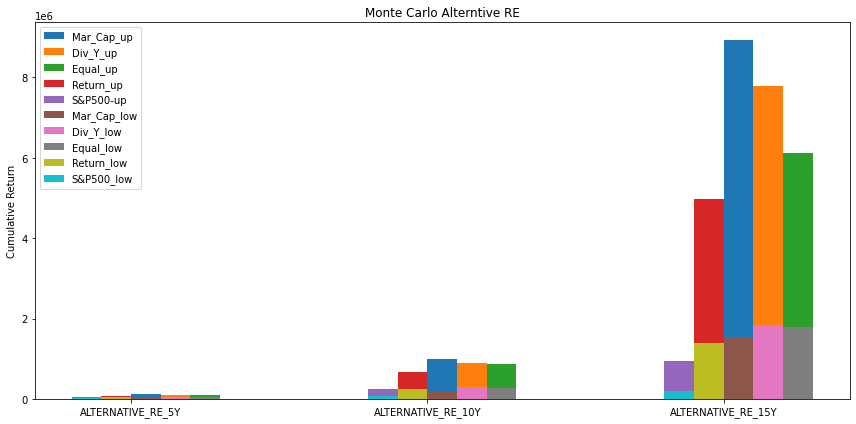

In [2]:
 
labels = ['ALTERNATIVE_RE_5Y', 'ALTERNATIVE_RE_10Y', 'ALTERNATIVE_RE_15Y']
Mar_Cap_up =[125944.46, 1004792.76, 8924420.21]
Mar_Cap_low =[40400.39, 199522.08, 1535192.72]
Div_Y_up=[92517.42, 891719.19, 7785919.8]
Div_Y_low=[48872.96, 302889.86, 1840512.03]
Equal_up=[100356.34, 873090.63, 6113449.79]
Equal_low=[45425.61, 269153.19, 1777052.38]
Return_up=[81412.14, 670933.15, 4964413.55 ]
Return_low=[45194.85, 253440.96, 1403055.77]
spy_up=[54966.1, 234794.94, 952911.17]
spy_low=[20644.63, 66706.94, 202417.23] 
 

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x + width/2,Mar_Cap_up, width, label='Mar_Cap_up') 
rects2 = ax.bar(x + width*1.5, Div_Y_up, width, label='Div_Y_up')
rects3 = ax.bar(x + width*2.5, Equal_up, width, label='Equal_up')
rects4 = ax.bar(x - width/2, Return_up, width, label='Return_up')
rects5 = ax.bar(x - width*1.5, spy_up, width, label='S&P500-up')
rects6 = ax.bar(x + width/2,Mar_Cap_low, width, label='Mar_Cap_low') 
rects7 = ax.bar(x + width*1.5, Div_Y_low, width, label='Div_Y_low')
rects8 = ax.bar(x + width*2.5, Equal_low, width, label='Equal_low')
rects9 = ax.bar(x - width/2, Return_low, width, label='Return_low')
rects10 = ax.bar(x - width*1.5, spy_low, width, label='S&P500_low')






# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative Return')
ax.set_title('Monte Carlo Alterntive RE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

# 